In [1]:
import pandas as pd

# Step 1: Data Preparation
# Load your dataset into a variable 'data'
data = pd.read_csv('/content/sample_data/Pre-Registration Summary for Moudud.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Extract relevant date features from the "Date" column
data['Date'] = pd.to_datetime(data['Date'])  # Convert "Date" to datetime type
data


,Date,Day Total,Month Total
0,2016-03-23,356,90434
1,2016-03-24,7921,90434
2,2016-03-27,24640,90434
3,2016-03-28,53740,90434
4,2016-03-29,2123,90434
...,...,...,...
1764,2023-09-13,243,3654
1765,2023-09-14,322,3654
1766,2023-09-17,338,3654
1767,2023-09-18,344,3654


In [2]:
# Delete the first 347 rows
data = data.iloc[347:]

# Reset the index after deleting rows
data.reset_index(drop=True, inplace=True)
data


,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1417,2023-09-13,243,3654
1418,2023-09-14,322,3654
1419,2023-09-17,338,3654
1420,2023-09-18,344,3654


In [3]:
# Define the cutoff date
cutoff_date = pd.to_datetime('8/31/2023')

# Filter the DataFrame to keep rows only before the cutoff date
data = data[data['Date'] <= cutoff_date]

# If you want to reset the index
data.reset_index(drop=True, inplace=True)
data

,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1404,2023-08-27,387,5954
1405,2023-08-28,393,5954
1406,2023-08-29,252,5954
1407,2023-08-30,247,5954


In [4]:
data['Year'] = data['Date'].dt.year
data


<ipython-input-4-a844fbdf328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


,Date,Day Total,Month Total,Year
0,2018-01-02,937,17664,2018
1,2018-01-03,856,17664,2018
2,2018-01-04,756,17664,2018
3,2018-01-06,13,17664,2018
4,2018-01-07,793,17664,2018
...,...,...,...,...
1404,2023-08-27,387,5954,2023
1405,2023-08-28,393,5954,2023
1406,2023-08-29,252,5954,2023
1407,2023-08-30,247,5954,2023


In [5]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data

<ipython-input-5-d2d9ab6cd24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
<ipython-input-5-d2d9ab6cd24d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = data['Date'].dt.day


,Date,Day Total,Month Total,Year,Month,Day
0,2018-01-02,937,17664,2018,1,2
1,2018-01-03,856,17664,2018,1,3
2,2018-01-04,756,17664,2018,1,4
3,2018-01-06,13,17664,2018,1,6
4,2018-01-07,793,17664,2018,1,7
...,...,...,...,...,...,...
1404,2023-08-27,387,5954,2023,8,27
1405,2023-08-28,393,5954,2023,8,28
1406,2023-08-29,252,5954,2023,8,29
1407,2023-08-30,247,5954,2023,8,30


In [6]:
# Step 2: Data Splitting
X = data[['Year', 'Month', 'Day']]  # Features
y = data['Month Total']  # Target variable

In [7]:
X

,Year,Month,Day
0,2018,1,2
1,2018,1,3
2,2018,1,4
3,2018,1,6
4,2018,1,7
...,...,...,...
1404,2023,8,27
1405,2023,8,28
1406,2023,8,29
1407,2023,8,30


In [8]:
y

0       17664
1       17664
2       17664
3       17664
4       17664
        ...  
1404     5954
1405     5954
1406     5954
1407     5954
1408     5954
Name: Month Total, Length: 1409, dtype: int64

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR

# Step 3: SVM Model Training
svm_regressor = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
svm_regressor.fit(X_train, y_train)

# Step 4: Evaluation
y_train_pred_svm = svm_regressor.predict(X_train)
y_test_pred_svm = svm_regressor.predict(X_test)

# Calculate evaluation metrics for regression on training data
mse_train_svm = mean_squared_error(y_train, y_train_pred_svm)
r2_train_svm = r2_score(y_train, y_train_pred_svm)

# Calculate evaluation metrics for regression on test data
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
r2_test_svm = r2_score(y_test, y_test_pred_svm)

print("Training Mean Squared Error (SVM):", mse_train_svm)
print("Training R-squared (SVM):", r2_train_svm)
print("Test Mean Squared Error (SVM):", mse_test_svm)
print("Test R-squared (SVM):", r2_test_svm)

# Check for overfitting
if mse_train_svm < mse_test_svm:
    print("The SVM model is not overfitting.")
else:
    print("The SVM model is overfitting")


Training Mean Squared Error (SVM): 34489424.73919047
Training R-squared (SVM): -0.021013949737497928
Test Mean Squared Error (SVM): 35277005.361161046
Test R-squared (SVM): -0.03632182442803411
The SVM model is not overfitting.


In [10]:
y_test_pred = svm_regressor.predict(X_test)

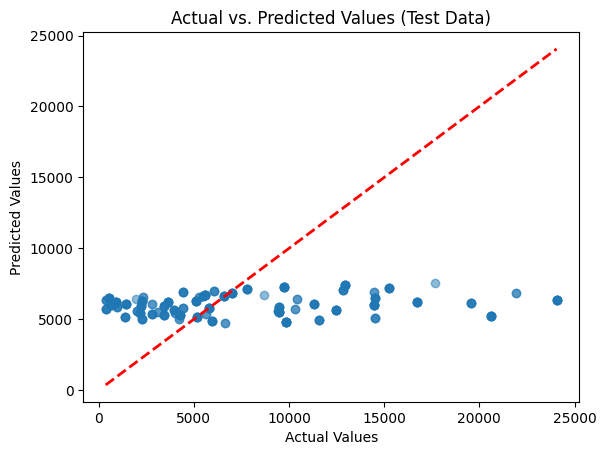

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values on the test data
plt.scatter(y_test, y_test_pred, alpha=0.5)  # alpha is for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Data)")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


In [12]:
import pandas as pd

# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Print the DataFrame
print(results)


      Actual    Predicted
353     7016  6819.429203
864      405  5728.109324
1310    2193  5448.303068
192    14527  6485.949384
782     2295  6269.118406
...      ...          ...
1001    2793  6061.589143
610     1464  6070.890857
188    14527  6485.949384
289    12860  7089.933744
890     2044  5592.857053

[282 rows x 2 columns]


In [13]:

single_date = {'Year': [2024], 'Month': [7], 'Day': [6]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = svm_regressor.predict(x_test_single)
y_test_pred

array([4699.76472206])

Naiv Bays

In [14]:
from sklearn.naive_bayes import GaussianNB

# Step 3: Naive Bayes Model Training
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train)

# Step 4: Evaluation
y_train_pred_nb = nb_regressor.predict(X_train)
y_test_pred_nb = nb_regressor.predict(X_test)

# Calculate evaluation metrics for regression on training data
mse_train_nb = mean_squared_error(y_train, y_train_pred_nb)
r2_train_nb = r2_score(y_train, y_train_pred_nb)

# Calculate evaluation metrics for regression on test data
mse_test_nb = mean_squared_error(y_test, y_test_pred_nb)
r2_test_nb = r2_score(y_test, y_test_pred_nb)

print("Training Mean Squared Error (Naive Bayes):", mse_train_nb)
print("Training R-squared (Naive Bayes):", r2_train_nb)
print("Test Mean Squared Error (Naive Bayes):", mse_test_nb)
print("Test R-squared (Naive Bayes):", r2_test_nb)

# Check for overfitting
if mse_train_nb < mse_test_nb:
    print("The Naive Bayes model is not overfitting.")
else:
    print("The Naive Bayes model may be overfitting. Further analysis is needed.")


Training Mean Squared Error (Naive Bayes): 0.0
Training R-squared (Naive Bayes): 1.0
Test Mean Squared Error (Naive Bayes): 0.0
Test R-squared (Naive Bayes): 1.0
The Naive Bayes model may be overfitting. Further analysis is needed.


In [15]:
y_test_pred = nb_regressor.predict(X_test)

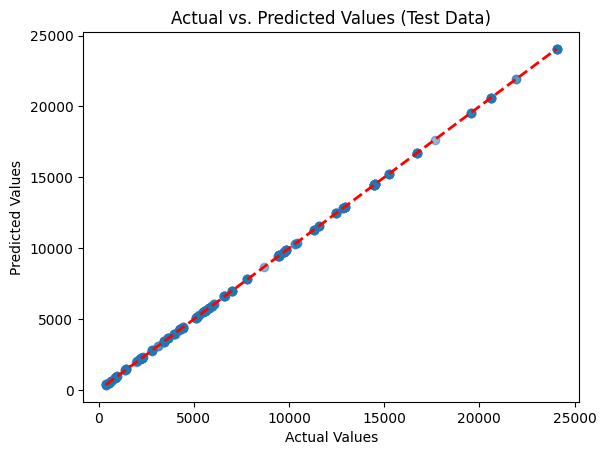

In [16]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values on the test data
plt.scatter(y_test, y_test_pred, alpha=0.5)  # alpha is for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Data)")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


In [17]:
import pandas as pd

# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Print the DataFrame
print(results)


      Actual  Predicted
353     7016       7016
864      405        405
1310    2193       2193
192    14527      14527
782     2295       2295
...      ...        ...
1001    2793       2793
610     1464       1464
188    14527      14527
289    12860      12860
890     2044       2044

[282 rows x 2 columns]


In [18]:

single_date = {'Year': [2023], 'Month': [9], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([14511])

In [19]:

single_date = {'Year': [2023], 'Month': [10], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([11553])

In [20]:

single_date = {'Year': [2023], 'Month': [11], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([9852])

In [21]:

single_date = {'Year': [2023], 'Month': [12], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([6642])

In [22]:

single_date = {'Year': [2024], 'Month': [1], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([9497])

In [23]:

single_date = {'Year': [2024], 'Month': [2], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([10337])